In [1]:
#import libraries
import nltk
import string
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from collections import Counter
import re

#from wordcloud import WordCloud, STOPWORDS

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
# uploading dataset
df_train= pd.read_csv('train.csv')

In [3]:
# checking the datasets
df_train.head(5)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
# uploading dataset
df_test= pd.read_csv('test.csv')

# checking the datasets
df_test.head(3)

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative


In [5]:
# Total number of rows, columns of test & train dataset.
print(f"Train: numbers of rows & columns {df_train.shape}")
print(f"Test: numbers of rows & columns {df_test.shape}")

Train: numbers of rows & columns (27481, 4)
Test: numbers of rows & columns (3534, 3)


In [6]:
# dtypes of Tain datasets.
print(f"Train: data type {df_train.dtypes}")

Train: data type textID           object
text             object
selected_text    object
sentiment        object
dtype: object


In [7]:
df_train.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [9]:
df_train.dropna(inplace=True)

In [10]:
# Number of unique values in sentiments
print('Sentiments in tweets are categorized as:',df_train.sentiment.unique())

Sentiments in tweets are categorized as: ['neutral' 'negative' 'positive']


In [11]:
df_train['sentiment'].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

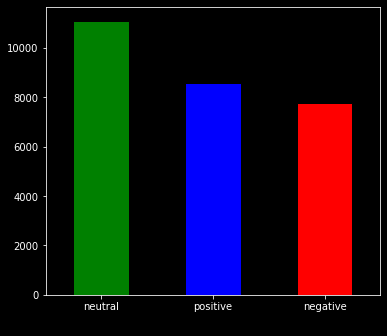

In [12]:
df_train['sentiment'].value_counts().plot.bar(color=['green', 'blue', 'red'], edgecolor='black')
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel('Sentiments', color = 'Black', fontsize='12', horizontalalignment="center")
plt.subplots_adjust(bottom=0.5, top=1.5)

In [13]:
print("Positive Tweet example:\n\t",df_train[df_train['sentiment']=='positive']['text'].values[0],'\n')
print("Negative Tweet example:\n\t",df_train[df_train['sentiment']=='negative']['text'].values[0],'\n')
print("Neutral tweet example:\n\t",df_train[df_train
['sentiment']=='neutral']['text'].values[2],'\n')

Positive Tweet example:
	 2am feedings for the baby are fun when he is all smiles and coos 

Negative Tweet example:
	  Sooo SAD I will miss you here in San Diego!!! 

Neutral tweet example:
	 Soooo high 



In [14]:
# cleaning the text
def clean_text(text):

    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text) 
    text = re.sub('http?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text) 
    return text

In [15]:
df_train['clean_text'] = df_train['text'].apply(lambda x : clean_text(x))
df_train['selected_text'] = df_train['selected_text'].apply(lambda x : clean_text(x))
df_train.head(10)

,textID,text,selected_text,sentiment,clean_text
0,cb774db0d1,"I`d have responded, if I were going",id have responded if i were going,neutral,id have responded if i were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,sooo sad,negative,sooo sad i will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",sons of,negative,sons of why couldnt they put them on the rel...
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,some shameless plugging for the best rangers...,neutral,some shameless plugging for the best rangers...
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,feedings for the baby are fun when he is all ...
7,50e14c0bb8,Soooo high,soooo high,neutral,soooo high
8,e050245fbd,Both of you,both of you,neutral,both of you
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,wow u just became cooler,positive,journey wow u just became cooler hehe is tha...


In [16]:
def tokenize(text):
    tokens= re.split('\W+', text) # W+ split based on white space
    return tokens
    
df_train['text_tokenized']=df_train['clean_text'].apply(lambda x: tokenize(x.lower()))
df_train.head()

,textID,text,selected_text,sentiment,clean_text,text_tokenized
0,cb774db0d1,"I`d have responded, if I were going",id have responded if i were going,neutral,id have responded if i were going,"[, id, have, responded, if, i, were, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,sooo sad,negative,sooo sad i will miss you here in san diego,"[, sooo, sad, i, will, miss, you, here, in, sa..."
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,"[my, boss, is, bullying, me]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,"[, what, interview, leave, me, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",sons of,negative,sons of why couldnt they put them on the rel...,"[, sons, of, why, couldnt, they, put, them, on..."


In [17]:
# load the list of words built into nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\engsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def remove_stopwords(tokenized_text):
    text = [word for word in tokenized_text if word not in stopwords]
    #text = ' '.join(word for word in text.split() if word not in stopwords)
    return text

df_train['text_nostop']=df_train['text_tokenized'].apply(lambda x: remove_stopwords(x))
df_train.head()




,textID,text,selected_text,sentiment,clean_text,text_tokenized,text_nostop
0,cb774db0d1,"I`d have responded, if I were going",id have responded if i were going,neutral,id have responded if i were going,"[, id, have, responded, if, i, were, going]","[, id, responded, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,sooo sad,negative,sooo sad i will miss you here in san diego,"[, sooo, sad, i, will, miss, you, here, in, sa...","[, sooo, sad, miss, san, diego]"
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,"[my, boss, is, bullying, me]","[boss, bullying]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,"[, what, interview, leave, me, alone]","[, interview, leave, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",sons of,negative,sons of why couldnt they put them on the rel...,"[, sons, of, why, couldnt, they, put, them, on...","[, sons, couldnt, put, releases, already, bought]"


In [19]:
# join tokens into string
def detokenize(text):
    text = " ".join(text)
    return text
# apply function to df
df_train['Updated_clean_text']=df_train['text_nostop'].apply(lambda x: detokenize(x))

In [20]:
df_train.head(5)

,textID,text,selected_text,sentiment,clean_text,text_tokenized,text_nostop,Updated_clean_text
0,cb774db0d1,"I`d have responded, if I were going",id have responded if i were going,neutral,id have responded if i were going,"[, id, have, responded, if, i, were, going]","[, id, responded, going]",id responded going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,sooo sad,negative,sooo sad i will miss you here in san diego,"[, sooo, sad, i, will, miss, you, here, in, sa...","[, sooo, sad, miss, san, diego]",sooo sad miss san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,"[my, boss, is, bullying, me]","[boss, bullying]",boss bullying
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,"[, what, interview, leave, me, alone]","[, interview, leave, alone]",interview leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",sons of,negative,sons of why couldnt they put them on the rel...,"[, sons, of, why, couldnt, they, put, them, on...","[, sons, couldnt, put, releases, already, bought]",sons couldnt put releases already bought


In [21]:
#nltk.download('omw-1.4')
#nltk.download()

In [22]:
lemma = WordNetLemmatizer()
lemming_text_nostop = df_train.text_nostop.apply(lambda x:[lemma.lemmatize(i) for i in x])
lemming_text_nostop 

0                                 [, id, responded, going]
1                          [, sooo, sad, miss, san, diego]
2                                          [bos, bullying]
3                              [, interview, leave, alone]
4          [, son, couldnt, put, release, already, bought]
5        [, shameless, plugging, best, ranger, forum, e...
6                       [, feeding, baby, fun, smile, coo]
7                                            [soooo, high]
8                                                       []
9        [, journey, wow, u, became, cooler, hehe, poss...
10       [, much, love, hopeful, reckon, chance, minima...
11       [really, really, like, song, love, story, tayl...
12               [sharpie, running, dangerously, low, ink]
13                 [want, go, music, tonight, lost, voice]
14                                      [test, test, lg, ]
15                                     [uh, oh, sunburned]
16         [, sok, trying, plot, alternative, speak, sig

In [23]:
# label encoding the sentiment
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['encoded_sentiment'] = le.fit_transform(df_train['sentiment'])
df_train.head()

,textID,text,selected_text,sentiment,clean_text,text_tokenized,text_nostop,Updated_clean_text,encoded_sentiment
0,cb774db0d1,"I`d have responded, if I were going",id have responded if i were going,neutral,id have responded if i were going,"[, id, have, responded, if, i, were, going]","[, id, responded, going]",id responded going,1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,sooo sad,negative,sooo sad i will miss you here in san diego,"[, sooo, sad, i, will, miss, you, here, in, sa...","[, sooo, sad, miss, san, diego]",sooo sad miss san diego,0
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,"[my, boss, is, bullying, me]","[boss, bullying]",boss bullying,0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,"[, what, interview, leave, me, alone]","[, interview, leave, alone]",interview leave alone,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",sons of,negative,sons of why couldnt they put them on the rel...,"[, sons, of, why, couldnt, they, put, them, on...","[, sons, couldnt, put, releases, already, bought]",sons couldnt put releases already bought,0


In [24]:
df_train["encoded_sentiment"].describe()

count    27480.000000
mean         1.029148
std          0.771118
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: encoded_sentiment, dtype: float64

In [28]:
df= pd.read_csv('file1.csv')
#top_30 = df.groupby('n_time')['n_time'].count() \
#.sort_values(ascending = False).head(30)
fig = px.bar(x='mood', y='n_time', color='n_time', data_frame=df)
fig.update_layout(xaxis_title="Top 30 words", yaxis_title="Frequency",
                     font=dict(family="Times New Roman", size=16, color="black"))
#remove bars with no name


fig.update_xaxes(tickangle=45)
fig.show()

In [25]:
positive_text = df_train["text_nostop"][df_train["sentiment"]=="positive"]
negative_text = df_train["text_nostop"][df_train["sentiment"]=="negative"]
neutral_text = df_train["text_nostop"][df_train["sentiment"]=="neutral"]

In [26]:
# Merge all the lists into one common list
positive_text = sum(positive_text, [])
negative_text = sum(negative_text, [])
neutral_text = sum(neutral_text, [])

In [38]:
# Plot the most common words in positive sentiment
import plotly.express as px
freq_pos = nltk.FreqDist(positive_text)
pos_df = pd.DataFrame({
    "words":list(freq_pos.keys()),
    "Count":list(freq_pos.values())
})
common_pos = pos_df.nlargest(columns="Count", n=30)
fig = px.histogram(common_pos, x="words", y="Count", labels={"words": "Positive Words", "Count":"Frequency"}, color="words")
fig.update_layout(xaxis_title=" Positive Words", yaxis_title="Frequency",
                     font=dict(family="Times New Roman", size=16, color="black"))
# Remove the grid lines
fig.update_layout(showlegend=False, xaxis_showgrid=False, yaxis_showgrid=False)
# Change the color of the axis line
fig.update_layout(xaxis_linecolor='black', yaxis_linecolor='black')
# Add tick lines to the y axis
fig.update_yaxes(ticks="inside", tickwidth=1, tickcolor="black")
# add tick to end poiny of y axis
fig.update_yaxes(tickfont=dict(family="Times New Roman", size=15, color="black" ))
# Change background color
fig.update_layout(paper_bgcolor="white", plot_bgcolor="white")

fig.update_xaxes(tickangle=45)

fig.show()

In [39]:
# Plot the most common words in Negative sentiment
import plotly.express as px
freq_pos = nltk.FreqDist(negative_text)
pos_df = pd.DataFrame({
    "words":list(freq_pos.keys()),
    "Count":list(freq_pos.values())
})
common_pos = pos_df.nlargest(columns="Count", n=30)
fig = px.histogram(common_pos, x="words", y="Count", labels={"words": "Words", "Count":"Frequency"}, color="words")
fig.update_layout(xaxis_title=" Negative Words", yaxis_title="Frequency",
                     font=dict(family="Times New Roman", size=16, color="black"))
# Remove the grid lines
fig.update_layout(showlegend=False, xaxis_showgrid=False, yaxis_showgrid=False)
# Change the color of the axis line
fig.update_layout(xaxis_linecolor='black', yaxis_linecolor='black')
# Add tick lines to the y axis
fig.update_yaxes(ticks="inside", tickwidth=1, tickcolor="black")
# add tick to end poiny of y axis
fig.update_yaxes(tickfont=dict(family="Times New Roman", size=15, color="black" ))
# Change background color
fig.update_layout(paper_bgcolor="white", plot_bgcolor="white")
fig.update_xaxes(tickangle=45)
fig.show()

In [40]:
# Plot the most common words in Neutral sentiment
import plotly.express as px
freq_pos = nltk.FreqDist(neutral_text)
pos_df = pd.DataFrame({
    "words":list(freq_pos.keys()),
    "Count":list(freq_pos.values())
})
common_pos = pos_df.nlargest(columns="Count", n=30)
fig = px.histogram(common_pos, x="words", y="Count", labels={"words": "Words", "Count":"Frequency"}, color="words")
fig.update_layout(xaxis_title=" Neutral Words", yaxis_title="Frequency", 
                     font=dict(family="Times New Roman", size=16, color="black"))
# Remove the grid lines
fig.update_layout(showlegend=False, xaxis_showgrid=False, yaxis_showgrid=False)
# Change the color of the axis line
fig.update_layout(xaxis_linecolor='black', yaxis_linecolor='black')
# Add tick lines to the y axis
fig.update_yaxes(ticks="inside", tickwidth=1, tickcolor="black")
# add tick to end poiny of y axis
fig.update_yaxes(tickfont=dict(family="Times New Roman", size=15, color="black" ))
# Change background color
fig.update_layout(paper_bgcolor="white", plot_bgcolor="white")
fig.update_xaxes(tickangle=45)
fig.show()

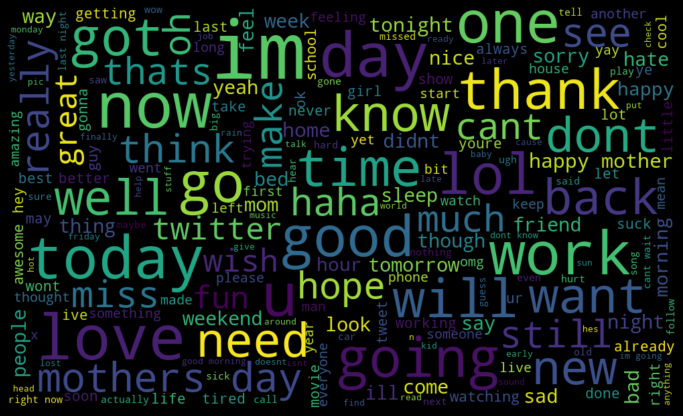

In [ ]:
# Most common words in the texts
words = " ".join([text for text in df_train["clean_text"]])
wordclouds = WordCloud(width=1000, height=600, random_state=42, max_font_size=120).generate(words)

plt.figure(figsize=(12, 8))
plt.imshow(wordclouds, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#X = df_train['Updated_clean_text']
y = df_train['encoded_sentiment']

In [ ]:
# Split into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=50000)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)




In [ ]:
from sklearn.metrics import accuracy_score
predicted_train_tfidf = model_tfidf.predict(X_train)
accuracy_train_tfidf = accuracy_score(y_train, predicted_train_tfidf)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf))

predicted_test_tfidf = model_tfidf.predict(X_test)
accuracy_test_tfidf = accuracy_score(y_test, predicted_test_tfidf)
accuracy_tfidf = accuracy_test_tfidf
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf))



Accuracy Training data: 82.5%
Accuracy Test data: 68.1%
